<b style='font-size:26px;font-family:Arial;color:#E37C4D'>Text Analytics using 'teradatagenai' Package</b>

#### Disclaimer

The sample code (“Sample Code”) provided is not covered by any Teradata agreements. Please be aware that Teradata has no control over the model responses to such sample code and such response may vary. The use of the model by Teradata is strictly for demonstration purposes and does not constitute any form of certification or endorsement. The sample code is provided “AS IS” and any express or implied warranties, including the implied warranties of merchantability and fitness for a particular purpose, are disclaimed. In no event shall Teradata be liable for any direct, indirect, incidental, special, exemplary, or consequential damages (including, but not limited to, procurement of substitute goods or services; loss of use, data, or profits; or business interruption) sustained by you or a third party, however caused and on any theory of liability, whether in contract, strict liability, or tort arising in any way out of the use of this sample code, even if advised of the possibility of such damage.


<b style = 'font-size:22px;font-family:Arial;color:#E37C4D'>Setting Up the Environment</b>

Before we start working with our data, we need to set up our environment. This involves importing the necessary packages and establishing a connection to Vantage.

Here's how we can do this:

In [ ]:
import os
import getpass
from teradataml import create_context, DataFrame, configure, remove_context
from teradatagenai import TextAnalyticsAI, TeradataAI, load_data

In [ ]:
# Creating connection with Vantage.
create_context(host=getpass.getpass("Host: "), user=getpass.getpass("User: "), password=getpass.getpass("Password: "))

<b style = 'font-size:22px;font-family:Arial;color:#E37C4D'>Loading the data</b>

We will be loading the sample data using the 'load_data()' helper function.

In [3]:
load_data("byom", "amazon_reviews_25")
data = DataFrame.from_table("amazon_reviews_25")
data

rev_id,aid,rev_name,helpful,rev_text,rating,prodsummary,unixrevtime,revtime
A2KU9IU07LOJS1,000100039X,Amazon Customer,"[0, 0]",This book has been a classic for many years. It has so much wisdom in it that it can be read numerous times and new things will come out each time. My favorite chapter is the one on children.,5.000,Great classic that everyone should read,1384905600,"11 20, 2013"
A26GKZPS079GFF,000100039X,Areej,"[2, 3]","I would have to say that this is the best book I""ve ever read.. I could feel every word deep in my heart everytime, of the many times I""ve read it! I would never get enough of it! its a treasure..",5.000,Touches my heart.. again and.. again...,982972800,"02 24, 2001"
A2S166WSCFIFP5,000100039X,"""adead_poet@hotmail.com """"adead_poet@hotmail.com""""""","[0, 2]","This is one my must have books. It is a masterpiece of spirituality. I""ll be the first to admit, its literary quality isn""t much. It is rather simplistically written, but the message behind it is so powerful that you have to read it. It will take you to enlightenment.",5.000,close to god,1071100800,"12 11, 2003"
A1340OFLZBW5NG,000100039X,Amazon Customer,"[0, 0]",I LOVE this book... his writing seems to just flow from page to page. I get something different from this book each time I read it..,5.000,Perhaps the greatest book that I have ever read,1231977600,"01 15, 2009"
A3V1MKC2BVWY48,000100039X,Alex Dawson,"[0, 0]","Reading this made my mind feel like a still pool of water, cool and quiet in a mossy grotto. It""s direct and simple wisdom has a depth of complexity that takes a quiet day to sink in, leaving you at peace. It is best to set time aside for it, relax, absorb, and let it softly clear your mind.",5.000,This book will bring you peace,1390780800,"01 27, 2014"
A1BM81XB4QHOA3,000100039X,"""Ahoro Blethends """"Seriously""""""","[0, 0]","This book provides a reflection that you can apply to your own life.And, a way for you to try and assess whether you are truly doing the right thing and making the most of your short time on this plane.",5.000,Must Read for Life Afficianados,1390003200,"01 18, 2014"
A3FFNE1DR5SI1W,000100039X,A. Morelli,"[1, 1]","Can""t say enough about Kahlil Gibran""s work among this piece. Everybody in the whole world should read this! There is almost too much to take in, really appreciate and put towards our daily lives. In my opinion, it is just one of the most beautiful literature pieces ever written. Would recommend to as a gift for anyone spiritual/poetic/philosophy/educational piece or just something to enjoy here and there. 5 stars for sure!",5.000,phenomenal piece of literature!,1340755200,"06 27, 2012"
A1KQ80Y692CDOI,000100039X,Atown,"[2, 9]","I read this about a year ago and can""t recall a great deal of the book. From what I do recall it was like a poem all the way through. While the writing was beautiful, I found it ambiguous and befuddled with meaning that I could not identify with. When Gibran speaks of God, I cannot identify because I have since abandoned those philosophies. It is thus difficult to revisit them in this book. I have the feeling a may have missed something great about this book. Indeed, I pulled wisdom from parts, but rather than go back and read it again, for now, perhaps I will move on to another of the many books out there that are enlightening and worth reading. Someday, I would like to read this again and dig deeper.",2.000,Eloquent,1206057600,"03 21, 2008"
A10000012B7CGYKOMPQ4L,000100039X,Adam,"[0, 0]",Spiritually and mentally inspiring! A book that allows you to question your morals and will help you discover who you really are!,5.000,Wonderful!,1355616000,"12 16, 2012"
A3FI0744PG1WYG,000100039X,"""Always Reading """"tkm""""""","[0, 0]","This is a timeless classic. Over the years I""ve given it as a gift more times than I can count, and will continue to do so. Addresses real life issues in a beautiful way and makes us reexamine our own attitude about how we see what happens in our li

<b style='font-size:28px;font-family:Arial;color:#E37C4D'>Teradata Python package for Generative-AI</b>

The following outlines a general workflow for ‘teradatagenai’.Users can utilize ONNX models using Teradata's BYOM Capability to generate embeddings for the input text data.

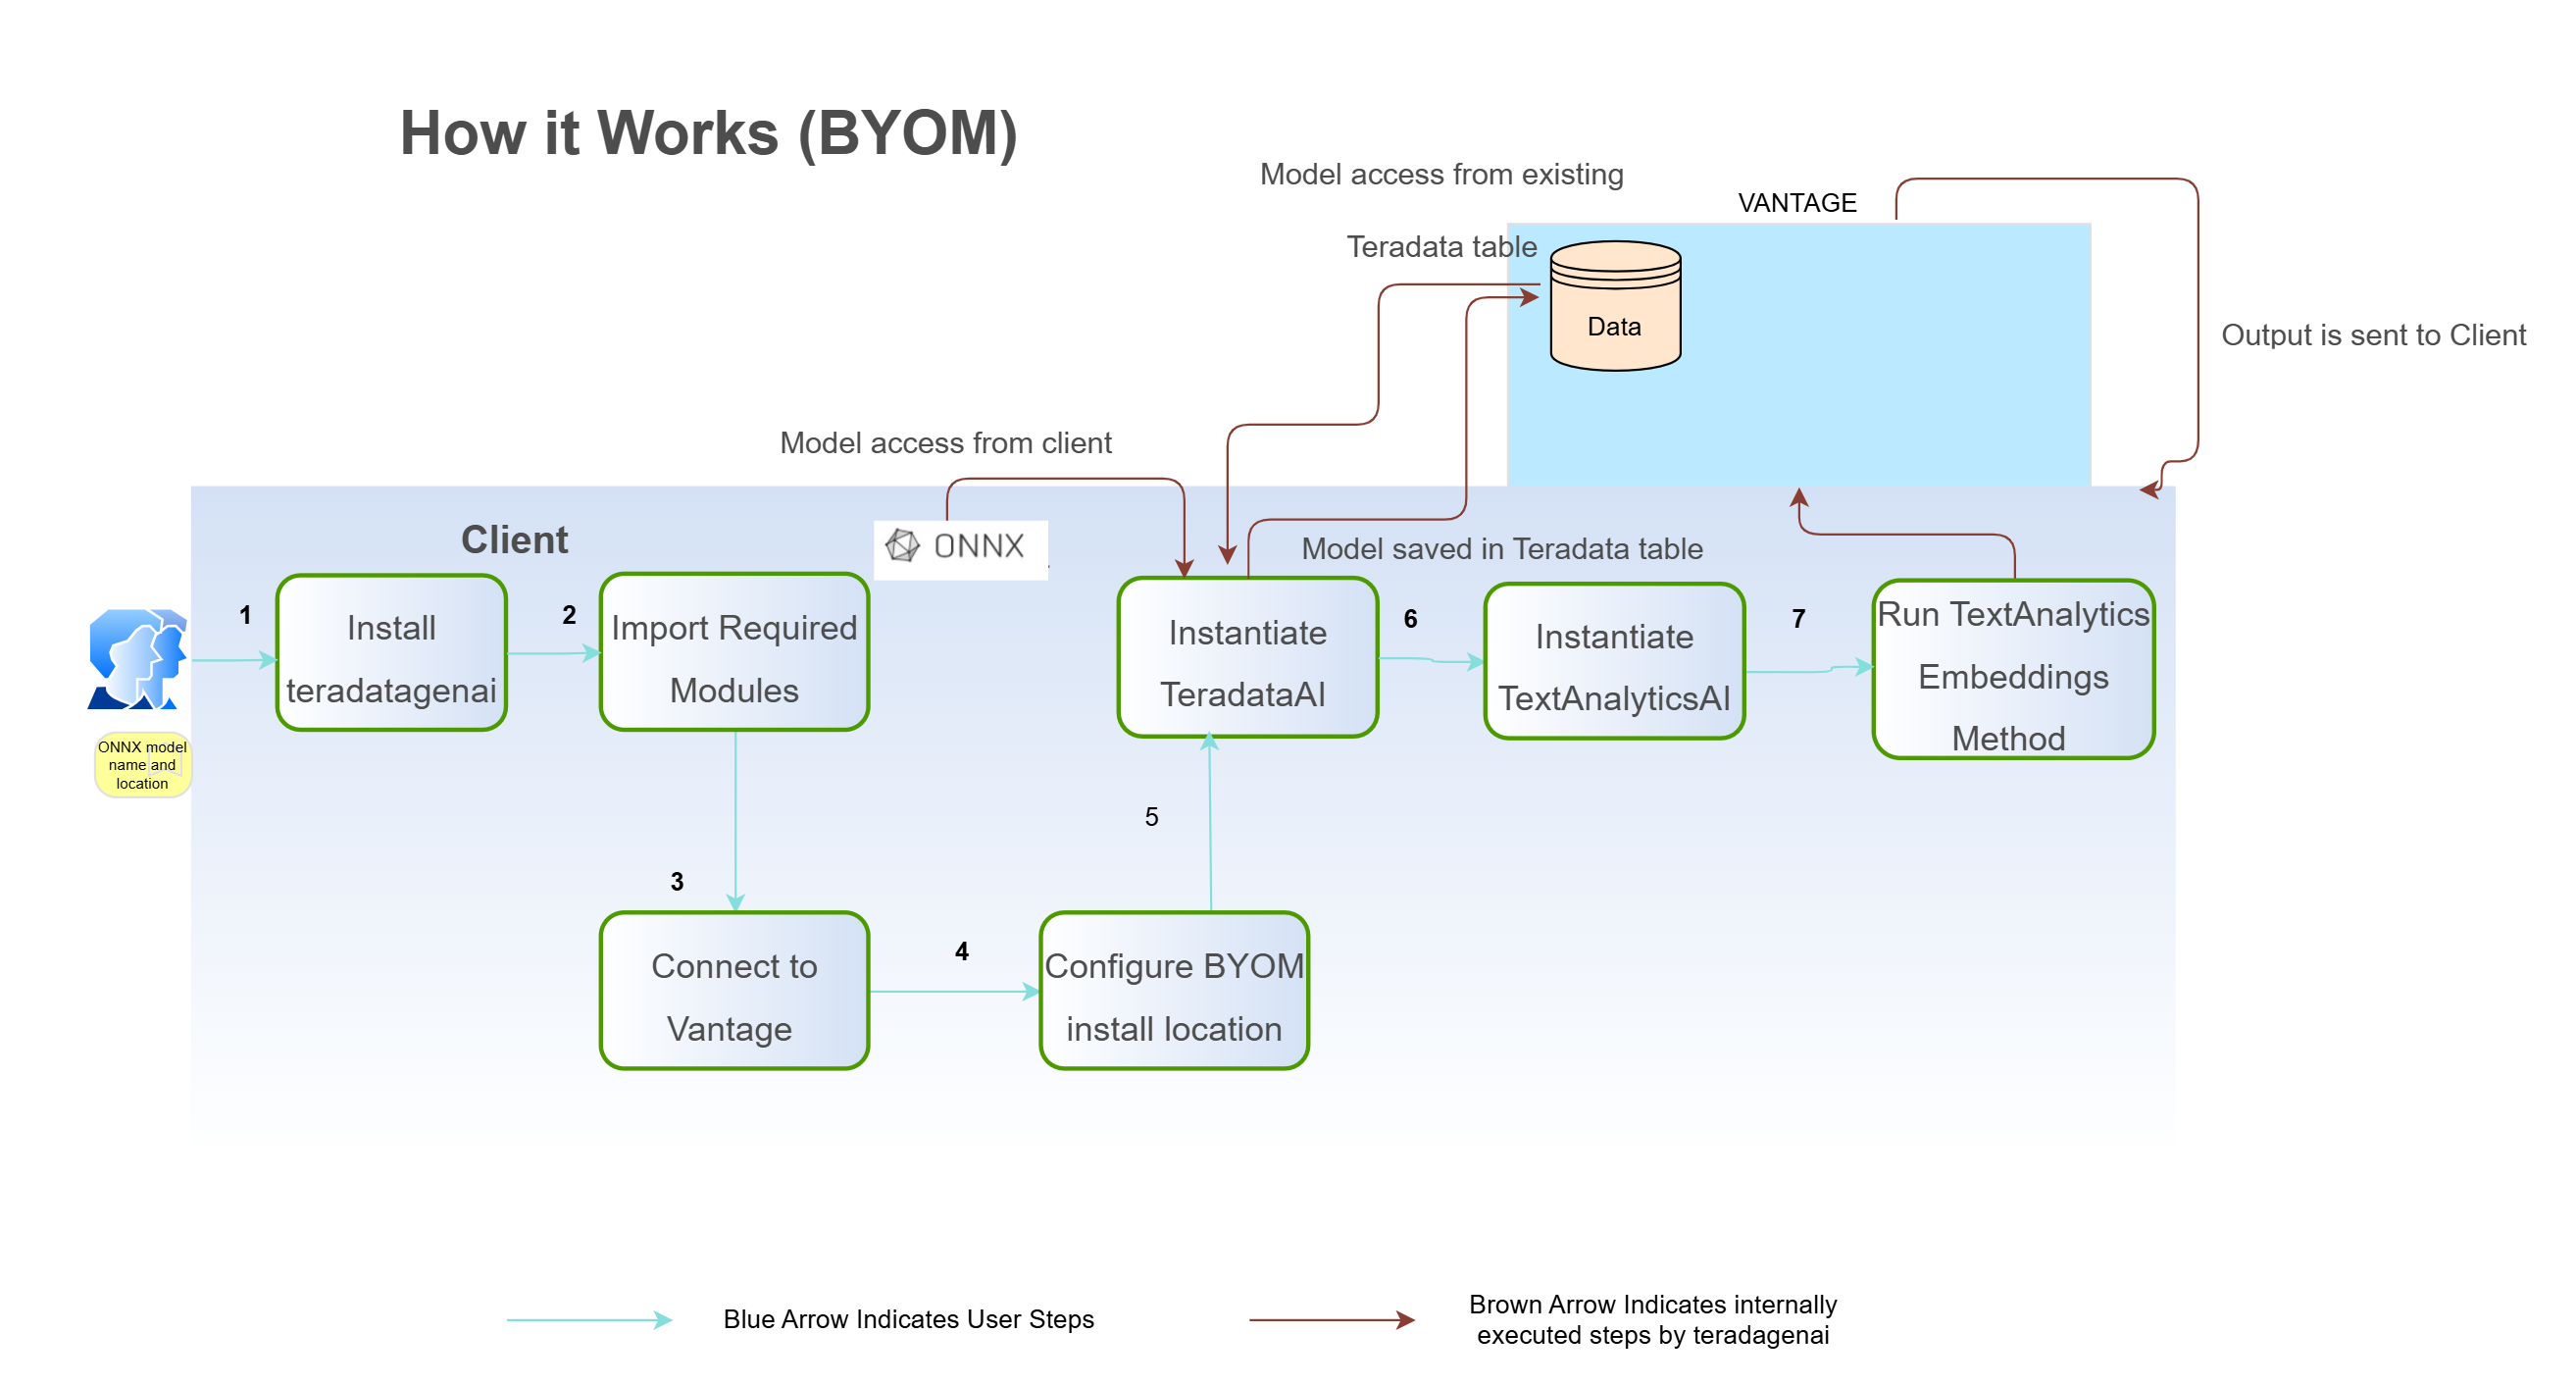

<b style='font-size:28px;font-family:Arial;color:#E37C4D'>Setting up TeradataAI to Access ONNX Models with BYOM</b>

This section demonstrates how to use the `TeradataAI` class to connect to ONNX models in Vantage using Bring Your Own Model (BYOM) capabilities.

With BYOM, you can easily integrate and use ONNX embedding models to generate embeddings for data within your Vantage environment.

**Typical Usage Scenarios:**

- <b>Use an Existing Model</b>
    - <b>Case 1:</b> Specify only the `model_id`.
    - <b>Case 2:</b> Specify both `model_id` and `table_name`.
    - <b>Case 3:</b> Specify `model_id`, `model_path`, and `table_name` for pre-installed models.

- <b>Install and Use a New Model</b>
    - <b>Case 1:</b> Provide `model_id`, `model_path`, and `tokenizer_path` to install and use a new ONNX model.

These flexible options allow you to quickly set up and leverage custom or pre-existing ONNX models for your workflows.


In [9]:
# Setting up BYOM install location.
configure.byom_install_location = getpass.getpass("BYOM Install Location: ")


In [ ]:
llm_onnx = TeradataAI(
    api_type='onnx',
    model_name=getpass.getpass("Model Name: "),
    model_id=getpass.getpass("Model ID: "),
    table_name=getpass.getpass("Table Name: "))

Model td-small-blob already present in tgenai


<b style='font-size:28px;font-family:Arial;color:#E37C4D'>Setting up TextAnalyticsAI to geneterate text embeddings</b>

This section describes how to instantiate the `TextAnalyticsAI` class.

### **Key Notes:**

- **General Method Arguments:**
    - **`column`**:  
        Specifies the name of the column to be used.  
        - Type: `str`  

    - **`data`**:  
        Specifies the `teradataml.DataFrame` that includes the column specified by the `column` argument.  
        - Type: `teradataml.DataFrame`  

- **Optional Parameters:**
    - **`persist`**:  
        Specifies whether to persist the output in permanent tables.  
        - Type: `bool`  
        - Default: `False`  

    - **`accumulate`**:  
        Specifies the name(s) of input `teradataml.DataFrame` column(s) to copy to the output.
        - Type: `str` or `list of str`  

    - **`volatile`**:  
        Specifies whether to store the results in a volatile table.  
        - Type: `bool`  
        - Default: `False`  

- **Additional Arguments (`**kwargs`)**:  
    Methods accept additional arguments that can be passed as part of `**kwargs`. For more details, refer to the user guide.


In [ ]:
# Instantiate the TextAnalyticsAI class with the ONNX model.
obj = TextAnalyticsAI(llm=llm_onnx)

<b style = 'font-size:22px;font-family:Arial;color:#E37C4D'>Generating Embeddings</b>

In this section, we'll explore the `embeddings()` function provided by TextAnalyticsAI.

In [13]:
obj.embeddings(data=data,
               column = "rev_text", 
               accumulate = "rev_id", 
               model_output_tensor = "SENTENCE_EMBEDDING")

rev_id,SENTENCE_EMBEDDING
A10000012B7CGYKOMPQ4L,b'60D343B514A673DF91E84BB582030BD05F9EA3CD2A3013D7E39813D7975843B8B254C3C6D25B3BC4CF93F3DB1D1373A5705EEBC44CF363B5959363D0B6A553B95DE623C5CDAC53D06941BBE873D633C445C903C2B9C2C3CD5692EBD8CF5A4BCF13E163CB6FE36BDA3E6F2BCB369053DA64507BDCF3B99BDA86DD13CFAD283BCE996883DFB6CAEBBE48B4F3C2B28413DA58AA9BD35D45F3CEBEE843D8EB4F03A5DBA973CEB3CF2BC35E02D3CF7A9883C2730183C8C8A16BC7E1B8A3C453E403C14AA533A7AC8C5BBA5A1D6BD61B5EC3CC2A58BBB5E5CEE3CABC645BC4B19113C63D5563C535C393D4BABB93C899B1F3DCCBA0E3DD1F2263C8E2DC1BDA73C1B3D3988AFBC052A06BD9B292FBC658A46BDDB971FBCB71F34BD43FDD03C4EC1653C2A4714BB2D35463DA2204D3D0A9C093D878824BD7A215C3CFF00443D2495C63CFD150D3D41FCB23CB05D6F3B9DE5873C454ABABC6F95413D7CEC343C8D27F53CB88C153C8CDBE73C156C9C3B3665D63AC1684BBDDD6B733CC64B5E392B7C29BDBC2CBEBCD15F54BC76565CBDF6FCCA3ED62709BDFD15563DA9A7C8BAC64132BD26BE273DAF75643B0DAA663CC028AEBC0AA7043DF6BF2BBA7B24A43DAA5837BD29C7253D9A5FBABCEDE2953C614E9A3D1150983D911BB0BC489052BDE1C318BDE65F07BDD0CEF33C434D963D3035B4BC146821BD82A0D3BD3B461EBC4F7B893D14D86FBDD1F840BA46B21A3C0A98D43C648339BD016E9DBC929799BC95DDF03C48337ABD2928C0BACAFC863D409AAD3D3B661C3DBD85283DAEF80EBC64CE2DBDEA32C6BD1856B0BD1B751B3DE54ACDBB37F78A3B86D3173DA51D99BCA0901CBD9288F0BC3DD8623B54FC963C077BDF3C25FC823D0B0BDD3AA24DBEBB9A283CBCA4854F3DAC68663CCF4286BD8335CA3DD5E107BC134184BD33E076BC3703E9BCEDB344BDE42789BB90C9AE3CFF8784BB51A211BEB446623D96756F3D526043BDD1DFEBBB271A543D549638BD2495013D474021BCDDA891BDDEF245BD427B483D321206BC83A2FCBC354F0E3BA569ABBD36755C3B748986BD36F88B3BB72835B94D1FFBBC884F01BD8A110DBD2CA754BC280AC43C6EF5C6BCBC515DBD27BB273D8F05CEBD11F789BB7778573CE9949E3C7355D83BE57B95BC02E98E3D98FE56BB27BFB83C48A90F3DAC68E4BC4FDA763C19F4D33CE249BB3C6450FABB3D30C73CD8D7043D72287F3C10CCEABC62545B3C1B1C3FBD725A00BE0EBADFBC954E96BEC7B68A3C976491BD66DC163D5CC3933CCCE824BD384884BB00C4C53C4FB1B5BACC6AF83C5CEF4E3D252B68BC287CBEBC206A3C3DFB8AEE3C93E460BDF8D17CBD1B6210BC83FD33BD1B915BBC20EB4BBD0C41E33D4504793DD13092BDF6E386BC1C12013D31852D3D853A1F3EF37BE63CBC3D673DE570063D374075BCE8DF4A3C65F311BE42F69C3CAB78EEBC2F8937BD80FEB7BC9FAC46BCE1BE533C1128EA3C873D593C7F7319BC34E6DABC3E1D5DBD93E7063D9C2F033D5F26CB3D4DE5D93C75BA9DBC5CDC163CEC626BBC4E910ABD96FE953BD57FFEBC403231BD8CA9D8BDDF224CBD7176843C0BF0173DF93D4EBC64C3D33A0BEAF2BCBAAB3E3D92C24E3DFD7C7BBCBD7384BDD067EE3A42EE4F3D24AB83BD61688FBBF6131CBDA019D93BAEEBBB3B2FF3A03D12309CBB1E9D4ABCCE3B75BD14CAC63CD4DC993ADD78F4BC17EE11BDAAFE59BBD17692BCB42A37BD36AF20BD68887BBD4554D6BCFC6A9B3D0AA3C7BCEFEA3FBD00B5E33C8F08E1B958DF72BDE277BF3C2136AABB852456BE171F8DBC74170FBC0213673D0E58CCBC32B9533D234EB93CE158A03DA0FF87BD772601BD9FE697BCE7B5003C8A425A3D847F21BD31653A3D1AF2173CACFBA63DF3A799BBD1D386BC61A1BC3B641EBB3C64CC8D3D59D7DA3D98DE0E3DBAB29F3C229A253D3B31063DBC04B4BCC80120BC3DC51B3BF170573D181FB0BC381715BCA255163AA362213D90F0DD3B8D3CB7BCAA4389BC5611873C4DA371BD93F2143C84EC883C7FA6933C6EB00C3D697C0A3E995E37BC8C0946BD0CC31D3D31D1993C577568BC7CCD22BC38457B3D7691C4B84B33D53C2906CB3DE1BFC03CD1E097BCEC8CB5BC9546383C62AFBEBD6B4A2DBD4AD55CBBCDE6AF3D50CA20BC1923DEBC'
A26GKZPS079GFF,b'6B18CEBB2333693C2FAE523DDD11B43CD6237D3B50AB213BCFAF723DD9D7F5BBBB9E0E3D37AE37BD3655B4B9514812BC1CEF52BCFA1FE7BBFD91963CC78E2D3D175AE7BBAD39F03B0534E9BD75F19FBC87FCE23D1CF19EBC1C79F9BC7B1CE1BC2BEE933CE65C903C72865D3C39F478BAECF988BDC013C3BDA541913B4066A6BB6EC43C3DC891233DDC524FBD8B5B8F3DD8A4D3BC25BC33BD1586893C75407EBC14792EBC4DFC9E3C6ECA14B98C7A083D0683F13C64C013BDB9F143BDCC0181BC9246DB3DBEB5D73C9B503BBD0C8F223D10320D3D8B479A3DEE69BEBC79B8103D727DA43C42521F3D28BBAD3B901026BB98BB903DE1A8203DF11122BE597EB53D9AB4C5BCB784A9BCF304823C265161BC8B5A1DBDA8B6D5BCE998DD3C9FE75C3D98D9C7BC698DC73C71D2963CAF925FBDD620FEBB55DB94BA0973B5BC4335803DE03A763D7F7C0C3D51F2DC3C882981BD8D4995BC88C31237EDF58B3DDBF7D0BB379D883DD80ACC3C67A641BCC8D64EBDCBDC23BD824D48BC6AD365BD2237C1BCA8D540BD56F6BCBC2715853C2129D33EE6EC753C97D1493DCB061DBDFC3F13BD437E92BCCD890A3DE7D443BCD319

<b style = 'font-size:22px;font-family:Arial;color:#E37C4D'>Cleanup</b>

In this section, we'll perform cleanup operations to free up resources. 

In [15]:
remove_context()

True